In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import logging
import pickle

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.utils import check_random_state

from recnn.preprocessing import permute_by_pt
from recnn.preprocessing import rotate

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

In [37]:
filename_train = "../data/w-vs-qcd/kt-train.pickle"
filename_test = "../data/w-vs-qcd/kt-test.pickle"
# filename_train = "../data/z/kt-train.pickle"
# filename_test = "../data/z/kt-test.pickle"

In [38]:
rng = check_random_state(1)

In [39]:
# Make training data
print("Loading training data...")

fd = open(filename_train, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_train)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

Loading training data...
	filename = ../data/w-vs-qcd/kt-train.pickle
	X size = 80000
	y size = 80000


In [40]:
# Preprocessing 
print("Preprocessing...")
X = [rotate(permute_by_pt(jet)) for jet in X]
tf = RobustScaler().fit(np.vstack([jet["content"] for jet in X]))

for jet in X:
    jet["content"] = tf.transform(jet["content"])

Preprocessing...


In [41]:
# Make test data 
print("Loading test data...")

fd = open(filename_test, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_test)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

Loading test data...
	filename = ../data/w-vs-qcd/kt-test.pickle
	X size = 20000
	y size = 20000


In [42]:
# Preprocessing 
print("Preprocessing...")
X = [rotate(permute_by_pt(jet)) for jet in X]

for jet in X:
    jet["content"] = tf.transform(jet["content"])

Preprocessing...


In [43]:
# Cropping
print("Cropping...")

# X_ = X
# y_ = y

X_ = [j for j in X if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]
y_ = [y[i] for i, j in enumerate(X) if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]

X = X_
y = y_

Cropping...


# Roc curves

roc_auc(n_hidden=5) = 0.895249372157
roc_auc(n_hidden=10) = 0.908205301475
roc_auc(n_hidden=20) = 0.911056974469
roc_auc(n_hidden=30) = 0.913779126455
roc_auc(n_hidden=40) = 0.914878814817
roc_auc(n_hidden=50) = 0.913057863753


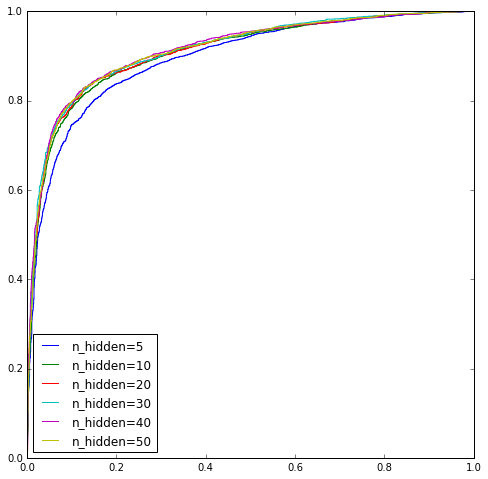

In [47]:
from recnn.recnn import grnn_predict_simple
from recnn.recnn import grnn_predict_gated
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

for i in [5, 10, 20, 30, 40, 50]:
    fd = open("../models/w-models/w-simple-n_hidden=%d.pickle" % i, "rb")
    params = pickle.load(fd)
    fd.close()

    predict = grnn_predict_simple
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(n_hidden=%d) =" % i, roc_auc_score(y, y_pred))
    plt.plot(fpr, tpr, label="n_hidden=%d" % i)

plt.legend(loc="best")
plt.show()

/home/gilles/anaconda3/envs/rec-nn/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide


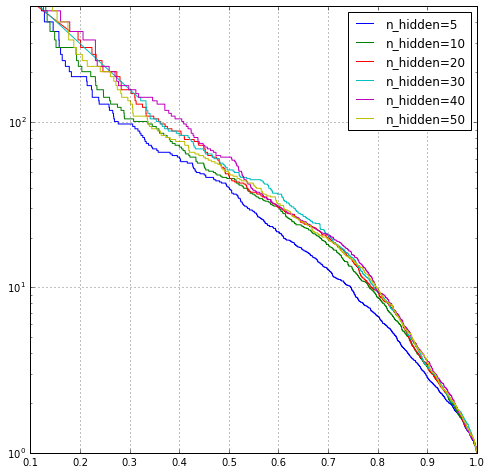

In [45]:
for i in [5, 10, 20, 30, 40, 50]:
    fd = open("../models/w-models/w-simple-n_hidden=%d.pickle" % i, "rb")
    params = pickle.load(fd)
    fd.close()

    predict = grnn_predict_simple
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    plt.plot(tpr, 1. / fpr, label="n_hidden=%d" % i)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()